In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import matplotlib
import scipy.stats as stats
from obspy.signal.trigger import trigger_onset

# sklearn packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve

# keras packages
from keras import backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential, Model
from keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D,Flatten,Dense,Dropout,BatchNormalization
from keras.utils import np_utils
from keras.optimizers import Adam

import math
from obspy.geodetics.base import gps2dist_azimuth
from scipy.optimize import curve_fit

import pandas as pd, numpy as np, matplotlib.pyplot as plt
from obspy.signal.filter import bandpass
from obspy.signal.detrend import polynomial
import math
from scipy.interpolate import interp1d

%matplotlib notebook

print('success')

success


<IPython.core.display.Javascript object>


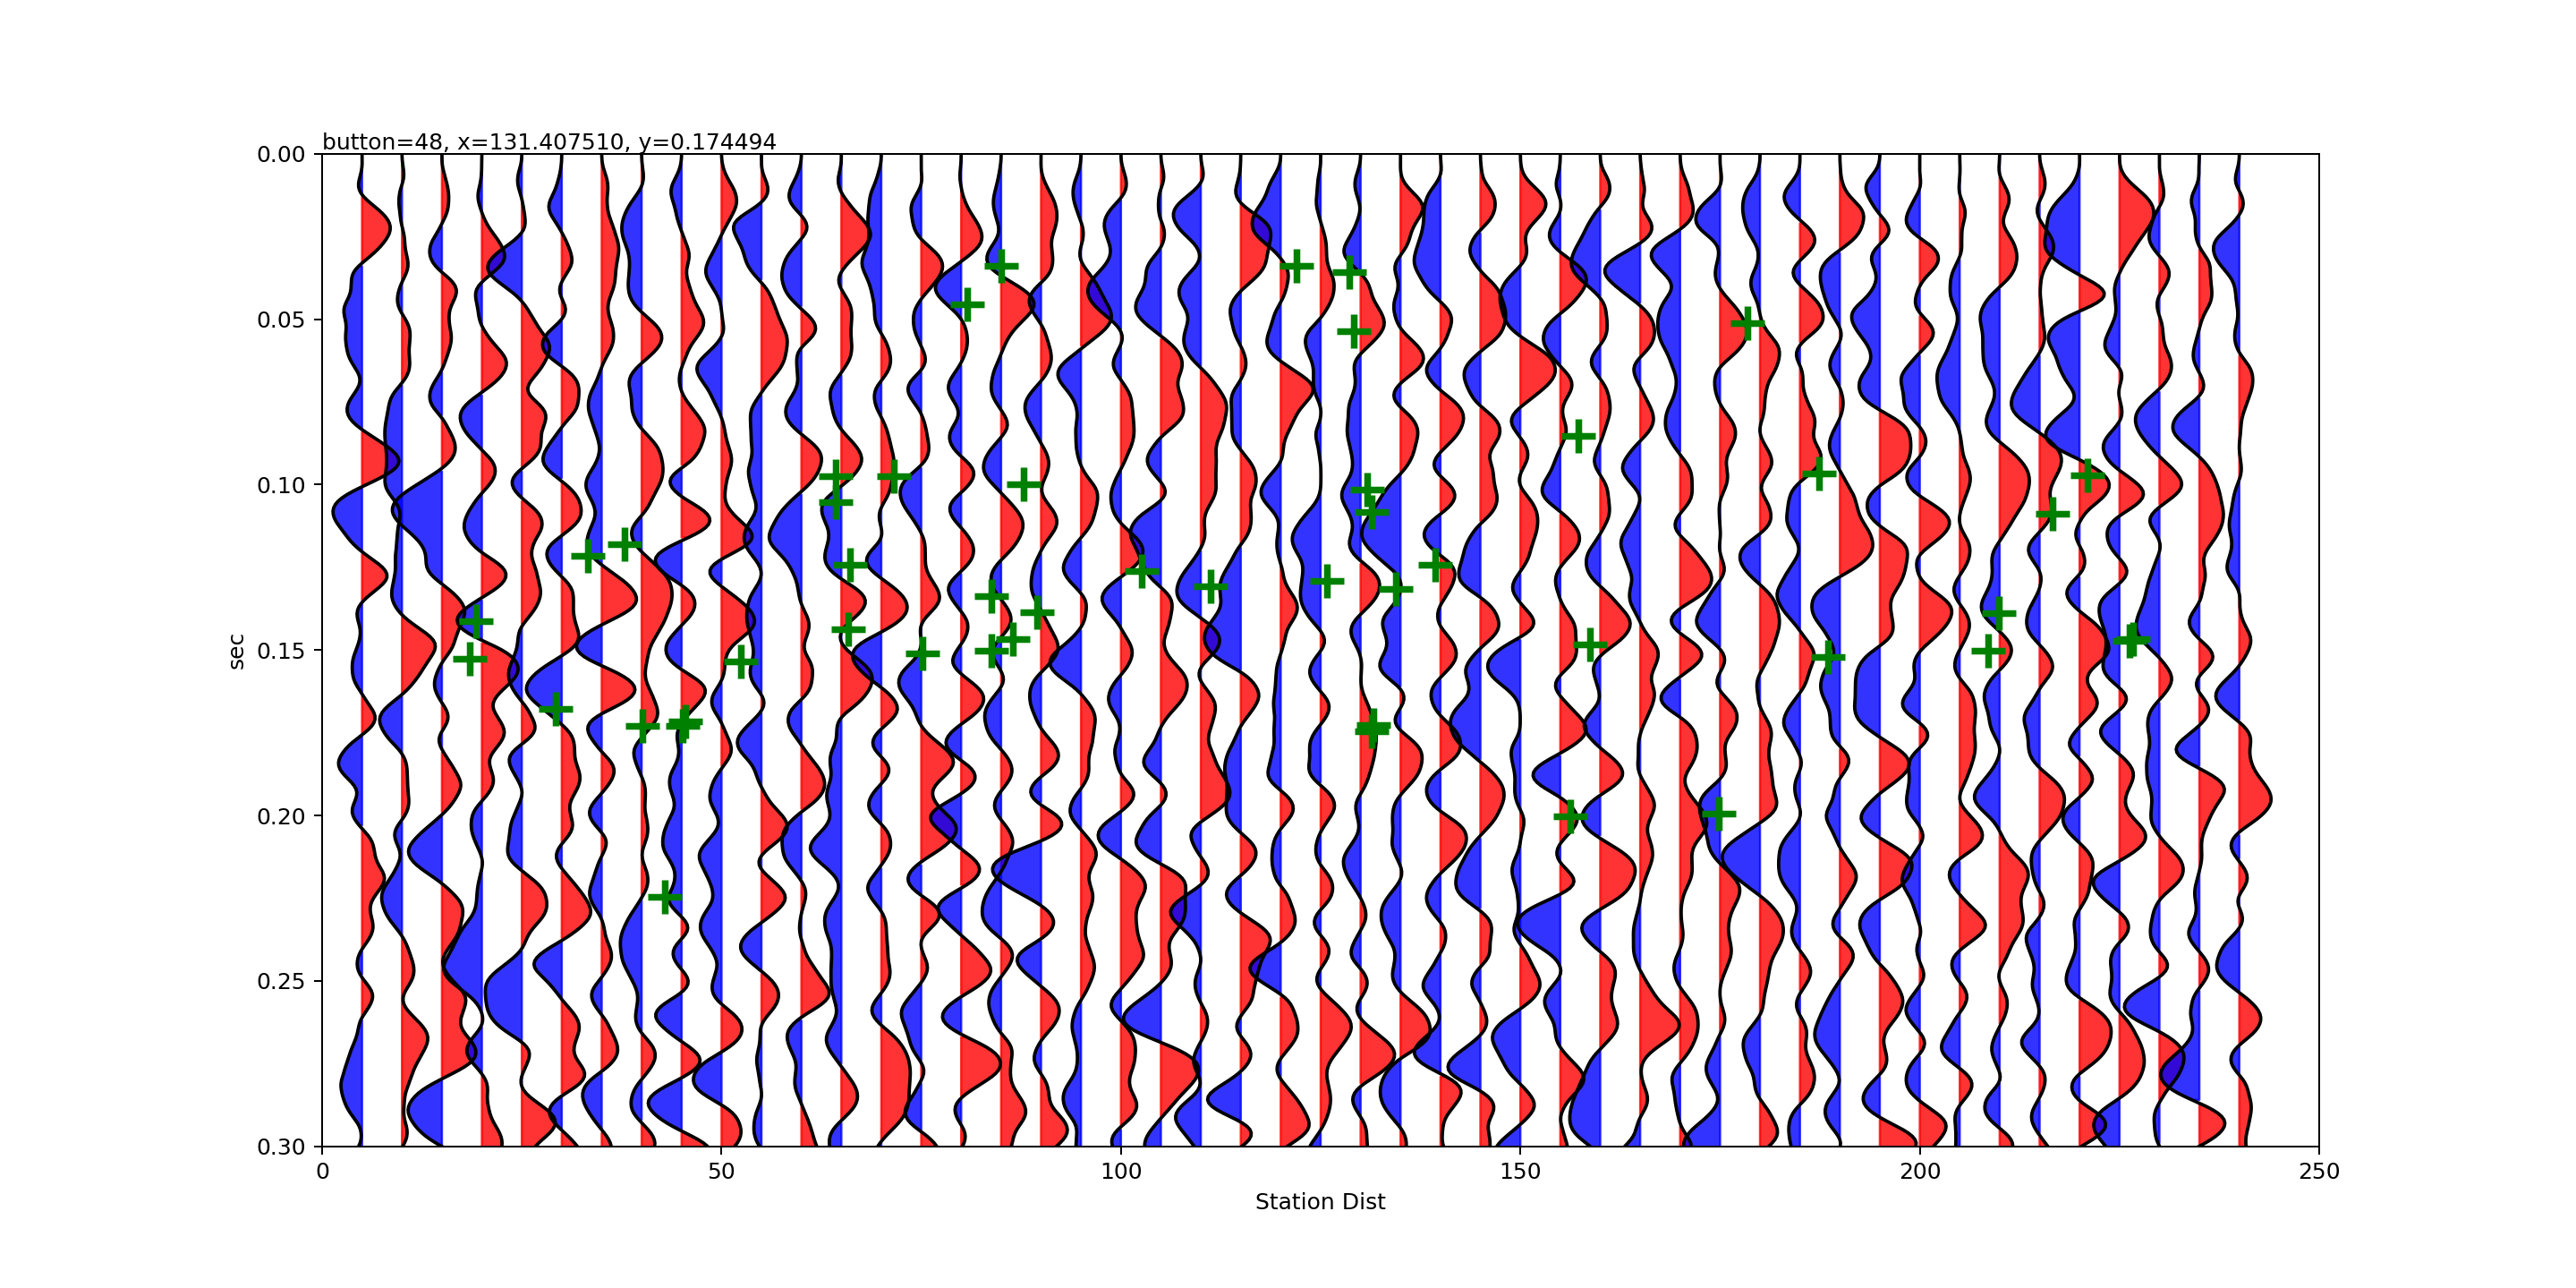

In [9]:
nostations = 48
nodata = 3000
dt = 0.001
dx = 5
seis1 = np.random.rand(nodata,nostations)

def plotseis(seis,doublecolor=False):
    fig =plt.figure(figsize=(16,8))
    ax = fig.add_subplot(111)
    for i in range(nostations):
    #     tr.normalize()
        tr=seis[:nodata,i]
    #     tr = minmax_scale(tr, feature_range=(-1,1))
        tr=polynomial(tr, order=3, plot=False)  
        tr=bandpass(tr,0.1,40,1/dt)
        tr=tr/tr.max()*5
        dist = dx*i+dx
        y = np.arange(nodata)*dt
        x = tr+dist
        ax.plot(x,y,'k')
        ax.fill_betweenx(y,x,dist,x > dist, color='r', alpha = 0.8)
        if doublecolor:
            ax.fill_betweenx(y,x,dist,x < dist, color='b', alpha = 0.8)

    ax.set_xlabel("Station Dist")    
    ax.set_ylabel("sec")    
    ax.set_ylim(0,0.3)
    ax.set_xlim(0,250)
#     plt.tight_layout()
    plt.gca().invert_yaxis()

    return fig, ax
    
def onclick(event):
#     tx = 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f' % (event.button, event.x, event.y, event.xdata, event.ydata)
    if len(picks) == nostations:
        np.save(filename,np.array(sorted(picks)))
        fig.canvas.mpl_disconnect(cid) 
        return 
    picks.append((event.xdata,event.ydata))
    tx = 'button=%d, x=%f, y=%f ' % (len(picks), event.xdata, event.ydata)
    text.set_text(tx)
    plt.plot(event.xdata,event.ydata,'g+',markersize=15,markeredgewidth=3)
    plt.show()

picks=[]
fig, ax =plotseis(seis1,doublecolor=True)
filename='tt1.npy'
text=ax.text(0,0, "", va="bottom", ha="left")
cid = fig.canvas.mpl_connect('button_press_event', onclick)